In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
dataset=load_digits()

In [28]:
df = pd.DataFrame(dataset.data)
df["target"] = dataset.target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


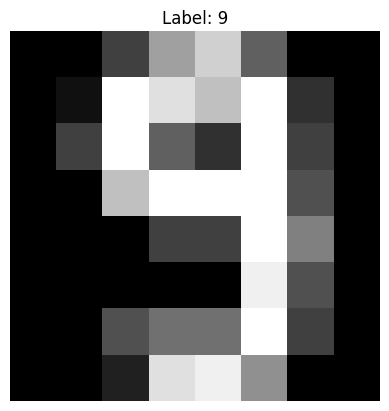

In [37]:
plt.imshow(dataset.images[1792], cmap="gray")
plt.title(f"Label: {dataset.target[1792]}")
plt.axis("off")
plt.show()

In [39]:
X=df.drop('target',axis=1)
y=df['target']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
log_model=LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
log_accuracy=accuracy_score(y_test,y_pred)
print(f'Logistic Model Accuracy : {log_accuracy*100:.2f} \n')
log_report=classification_report(y_test,y_pred)
print('Logistic Model Accuracy : \n')
print(log_report)

Logistic Model Accuracy : 97.50 

Logistic Model Accuracy : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [62]:
sample=df.drop('target',axis=1).iloc[1792, :].values.reshape(1, -1)

In [63]:
log_model.predict(sample)

array([9])

C:\Users\sk021\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Model Accuracy : 96.67 

Logistic Model Accuracy : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.98      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.97      0.93      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360
 

Confusion metrix for Logistic Regrssion 



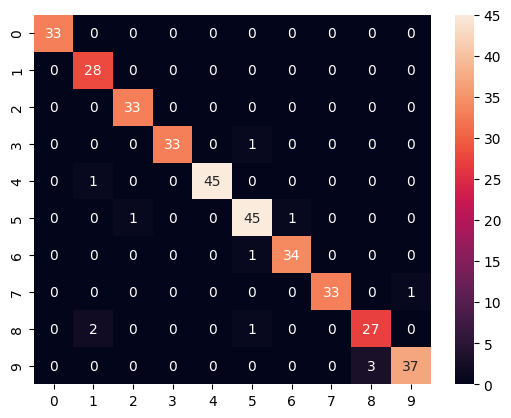

In [94]:
log_model=LogisticRegression(max_iter=1500,multi_class='ovr')
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
log_accuracy=accuracy_score(y_test,y_pred)
print(f'Logistic Model Accuracy : {log_accuracy*100:.2f} \n')
log_report=classification_report(y_test,y_pred)
print('Logistic Model Accuracy : \n')
print(log_report,'\n')
print("Confusion metrix for Logistic Regrssion \n")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

KNN Model Accuracy : 98.61 

KNN Model Accuracy : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.96      0.97        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360
 

Confusion metrix for KNN Model 



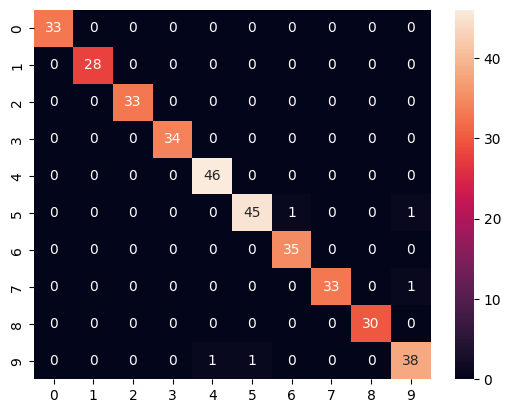

In [88]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train,y_train)
y_pred=KNN_model.predict(X_test)
KNN_accuracy=accuracy_score(y_test,y_pred)
print(f'KNN Model Accuracy : {KNN_accuracy*100:.2f} \n')
KNN_report=classification_report(y_test,y_pred)
print('KNN Model Accuracy : \n')
print(KNN_report,'\n')
print("Confusion metrix for KNN Model \n")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

DT Model Accuracy : 84.44 

 DT Model Accuracy : 

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.92      0.79      0.85        28
           2       0.92      0.70      0.79        33
           3       0.70      0.88      0.78        34
           4       0.82      0.91      0.87        46
           5       0.93      0.87      0.90        47
           6       0.89      0.91      0.90        35
           7       0.79      0.91      0.85        34
           8       0.81      0.70      0.75        30
           9       0.77      0.82      0.80        40

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360
 

Confusion metrix for Decision Tree Model


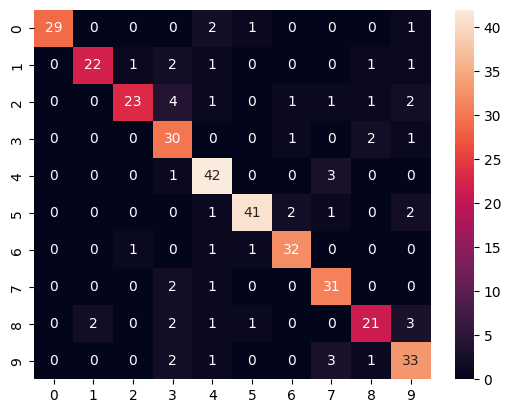

In [87]:
DT_model=DecisionTreeClassifier(max_depth=16)
DT_model.fit(X_train,y_train)
y_pred=DT_model.predict(X_test)
DT_accuracy=accuracy_score(y_test,y_pred)
print(f'DT Model Accuracy : {DT_accuracy*100:.2f} \n')
DT_report=classification_report(y_test,y_pred)
print(' DT Model Accuracy : \n')
print(DT_report,'\n')
print("Confusion metrix for Decision Tree Model")
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show()

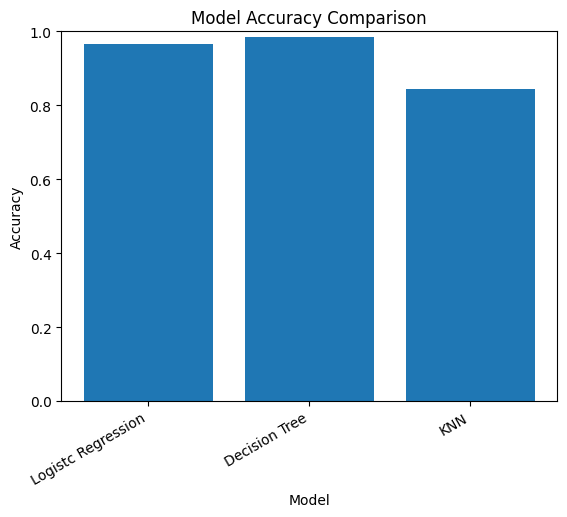

In [106]:
models = ['Logistc Regression','Decision Tree','KNN']
accuracies=[log_accuracy,KNN_accuracy,DT_accuracy]
plt.bar(models,accuracies)
plt.savefig('comparing-model-accuracy.png')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)  
plt.xticks(rotation=30)
plt.xticks(rotation=30,ha='right')
plt.show()